# Module 2 - Data Wrangling

Materia: Ciencia y Analítica de Datos
<br>
Alumno: Ricardo Morales Bustillos
<br>
Matrícula: A017400321

### Dealing with missing values

In [19]:
# Missing values are '?' 'NA', etc.
# Solutions are: Droping missing values or to replace them.

import pandas as pd
import numpy as np
data={'Name':['Karan','Rohit','Juan','Sahil','Aryan'],'Age':[23,22,np.nan,21,24]}
df=pd.DataFrame(data)
df

# # droping missing values
df.dropna(inplace = True)
df

# replacing missing values
mean = df['Age'].mean()
df['Age'].replace(np.nan, mean)

(22.5,
     Name   Age
 0  Karan  23.0
 1  Rohit  22.0
 2   Juan   NaN
 3  Sahil  21.0
 4  Aryan  24.0)

### Data Formatting in Python

In [33]:
# Applying calculations to an entire column
data={'Name':['Karan','Rohit','Juan','Sahil','Aryan'],'Age':[23,22,26,21,24]}
df=pd.DataFrame(data)
df

df['Age'] = df['Age']/10
df.rename(columns = {'Age': 'Decades'}, inplace = True)
df['Decades'] = df['Decades'].astype('int')
df


,Name,Decades
0,Karan,2
1,Rohit,2
2,Juan,2
3,Sahil,2
4,Aryan,2


### Data Normalization in Python 

In [39]:
data={'Name':['Karan','Rohit','Juan','Sahil','Aryan'],'Age':[23,22,np.nan,21,24]}
df=pd.DataFrame(data)
df

# droping missing values
df.dropna(inplace = True)
df

#Normalizing with max value
df['Age'] = df['Age']/df['Age'].max()
df

# Normalizing with min-max
df['Age'] = ((df['Age']-df['Age'].min()) / (df['Age'].max()-df['Age'].min())).round(3)
df

# Normalizing with z-score
df['Age'] = (df['Age']-df['Age'].mean()) / (df['Age'].std())
df


,Name,Age
0,Karan,0.387995
1,Rohit,-0.387995
3,Sahil,-1.161662
4,Aryan,1.161662


### Binning in Python

In [42]:
data={'Name':['Karan','Rohit','Juan','Sahil','Aryan'],'Age':[23,22,np.nan,21,24]}
df=pd.DataFrame(data)
df

# droping missing values
df.dropna(inplace = True)
df

# creating bins
bins = np.linspace(min(df['Age']), max(df['Age']), 3)
group_names = ['Low','High']
df['Age'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest=True)
df

,Name,Age
0,Karan,High
1,Rohit,Low
3,Sahil,Low
4,Aryan,High


### Turning categorical variables into quantitative variables in Python

In [44]:
data={'Name':['Karan','Rohit','Juan','Sahil','Aryan'],'Gender':['Female','Female','Male','Female','Male']}
df=pd.DataFrame(data)
df

pd.get_dummies(df['Gender'])

,Female,Male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


### Lab 2

In [47]:
from urllib import request
import pandas as pd
import matplotlib.pylab as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.6         204 non-null    float64
 10  168.8        204 non-null    float64
 11  64.1         204 non-null    float64
 12  48.8         204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

In [48]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Average of normalized-losses: 122.0
Average of bore: 3.3297512437810943
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


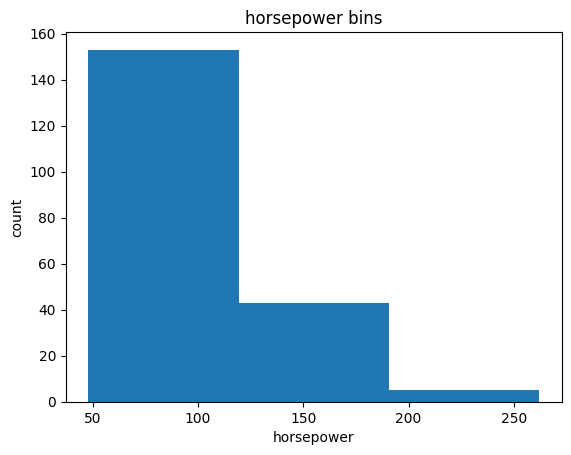

In [53]:
df = pd.read_csv(url, names = headers)

# replacing ?
df.replace("?", np.nan, inplace = True)
df.head(5)

#measuring missing values
missing_data = df.isnull()
missing_data.head(5)

# Normalizing and replacing values
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

df["bore"].replace(np.nan, avg_bore, inplace=True)

## QUESTION 1 Based on the example above, replace NaN in "stroke" column with the mean value.
avg_stk = df['stroke'].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stk, inplace = True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

df['num-of-doors'].value_counts()

df['num-of-doors'].value_counts().idxmax()

df["num-of-doors"].replace(np.nan, "four", inplace=True)

df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)
df # No missing values

# Correcting data format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

# Data standarization
df['city-L/100km'] = 235/df["city-mpg"]

## Question #2: According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

# Data normalization
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

## Question #3: According to the example above, normalize the column "height".
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

# Bining
df["horsepower"]=df["horsepower"].astype(int, copy=True)
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

df["horsepower-binned"].value_counts()

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Changing variables to dummies
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

df = pd.concat([df, dummy_variable_1], axis=1)

df.drop("fuel-type", axis = 1, inplace=True)

# Question #4: Similar to before, create an indicator variable for the column "aspiration"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

dummy_variable_2.head()

# Question #5: Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.
df = pd.concat([df, dummy_variable_2], axis=1)

df.drop('aspiration', axis = 1, inplace=True)
